In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('avocado_ripeness_dataset.csv')


## Preprocessing

In [3]:
df

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking
...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard
246,21.6,17,36,19,black,47,182,240,firm-ripe
247,14.0,4,40,17,black,37,188,274,ripe
248,61.5,63,87,75,green,65,261,162,pre-conditioned


In [4]:
color_dummies = pd.get_dummies(df['color_category'], prefix="color_category", dtype= int)
df = df.join(color_dummies)

In [5]:
df['ripeness'].drop_duplicates().to_dict()

{0: 'ripe', 1: 'pre-conditioned', 2: 'hard', 4: 'breaking', 14: 'firm-ripe'}

In [6]:
ripenessDict = {
    'hard' : 1,
    'pre-conditioned' : 2,
    'breaking' : 3,
    'firm-ripe' : 4,
    'ripe' : 5,
}

df['target'] = df['ripeness'].apply(lambda x: ripenessDict[x])

In [7]:
df.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness', 'color_category_black',
       'color_category_dark green', 'color_category_green',
       'color_category_purple', 'target'],
      dtype='object')

## Split Test and Train set

In [8]:
x_cols = ['firmness', 'hue', 'saturation', 'brightness',
       'sound_db', 'weight_g', 'size_cm3', 'color_category_black',
       'color_category_dark green', 'color_category_green',
       'color_category_purple']
y_cols = ['target']

In [9]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [16]:
df_train, df_test = shuffle_and_split_data(df, 0.2)
x_train = df_train[x_cols]
y_train = df_train[y_cols]
x_test = df_test[x_cols]
y_test = df_test[y_cols]

In [19]:
from matplotlib.colors import ListedColormap


def show2ColsInScatter(df, colx, coly):
    custom_cmap = ListedColormap(['red', 'blue', 'gray', 'yellow', 'green'])
    df.plot(
        kind='scatter',
        x=colx,
        y=coly,
        c=y_train['target'],
        cmap=custom_cmap,
        colorbar=True,
        figsize=(8, 6)
    )

In [20]:
x_train.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'sound_db', 'weight_g',
       'size_cm3', 'color_category_black', 'color_category_dark green',
       'color_category_green', 'color_category_purple'],
      dtype='object')

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import combinations
import math

# Define custom colormap for 5 categories
custom_cmap = ListedColormap(['red', 'blue', 'gray', 'yellow', 'green'])

def showAllScatterPlots(df, target, columns=None):
    if columns is None:
        columns = df.columns.tolist()

    pairs = list(combinations(columns, 2))
    n = len(pairs)

    # Determine grid size for subplots
    cols = 3  # You can adjust this for more or fewer columns
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()  # Flatten in case of 2D axes array

    for i, (x_col, y_col) in enumerate(pairs):
        ax = axes[i]
        scatter = ax.scatter(
            df[x_col],
            df[y_col],
            c=target,
            cmap=custom_cmap,
            alpha=0.7
        )
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_title(f'{x_col} vs {y_col}')

    # Hide any extra subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Add a shared colorbar
    fig.colorbar(scatter, ax=axes[:i+1], location='right', label='Target')

    plt.tight_layout()
    plt.show()

C:\Users\m.rahimi\AppData\Local\Temp\ipykernel_10484\1979452240.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


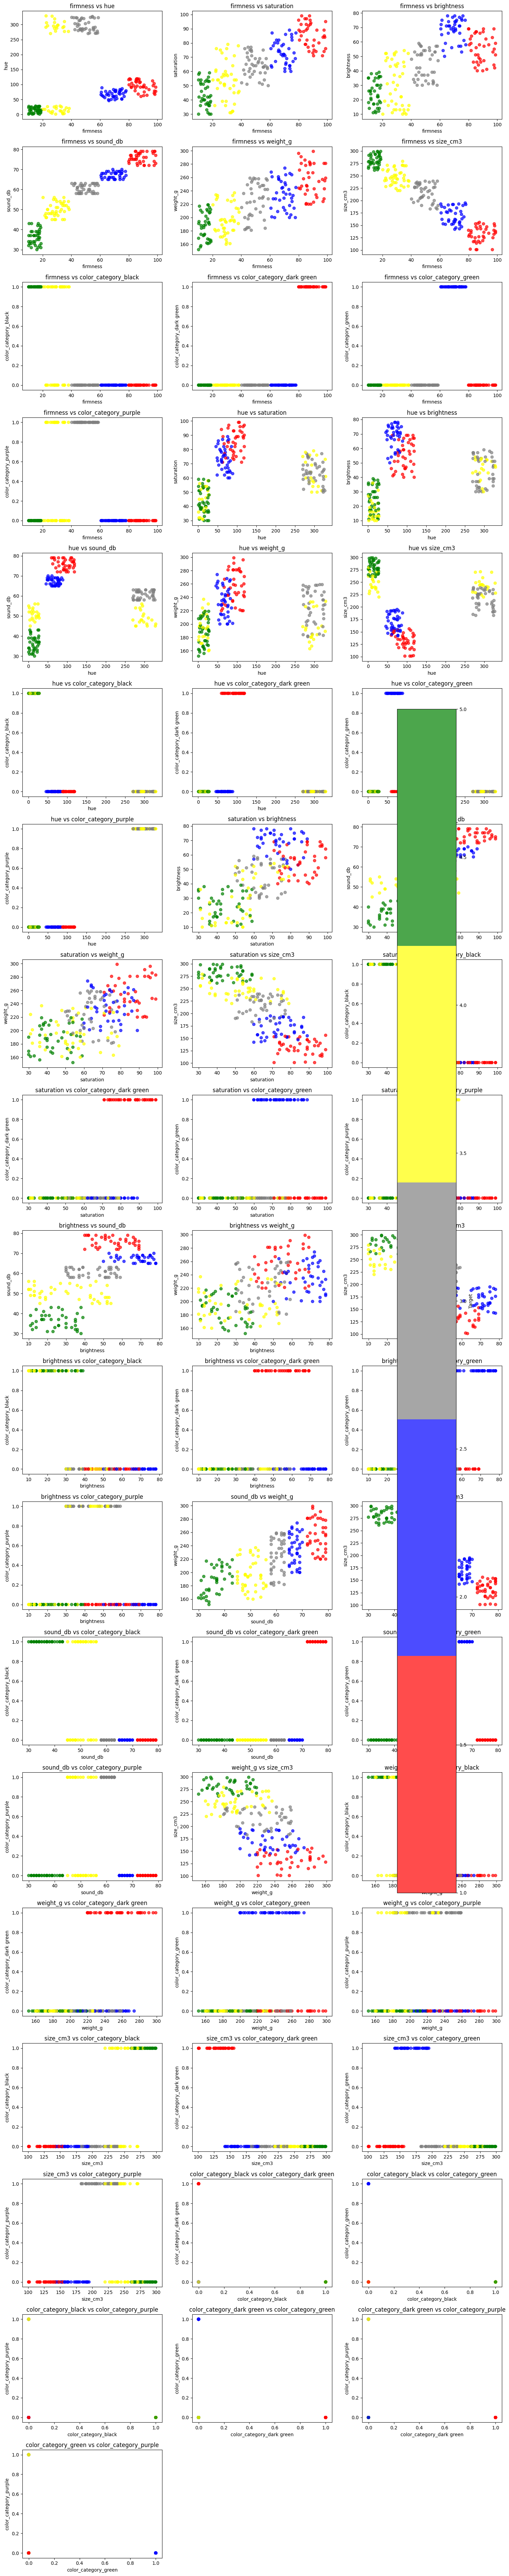

In [34]:
showAllScatterPlots(x_train, y_train['target'])

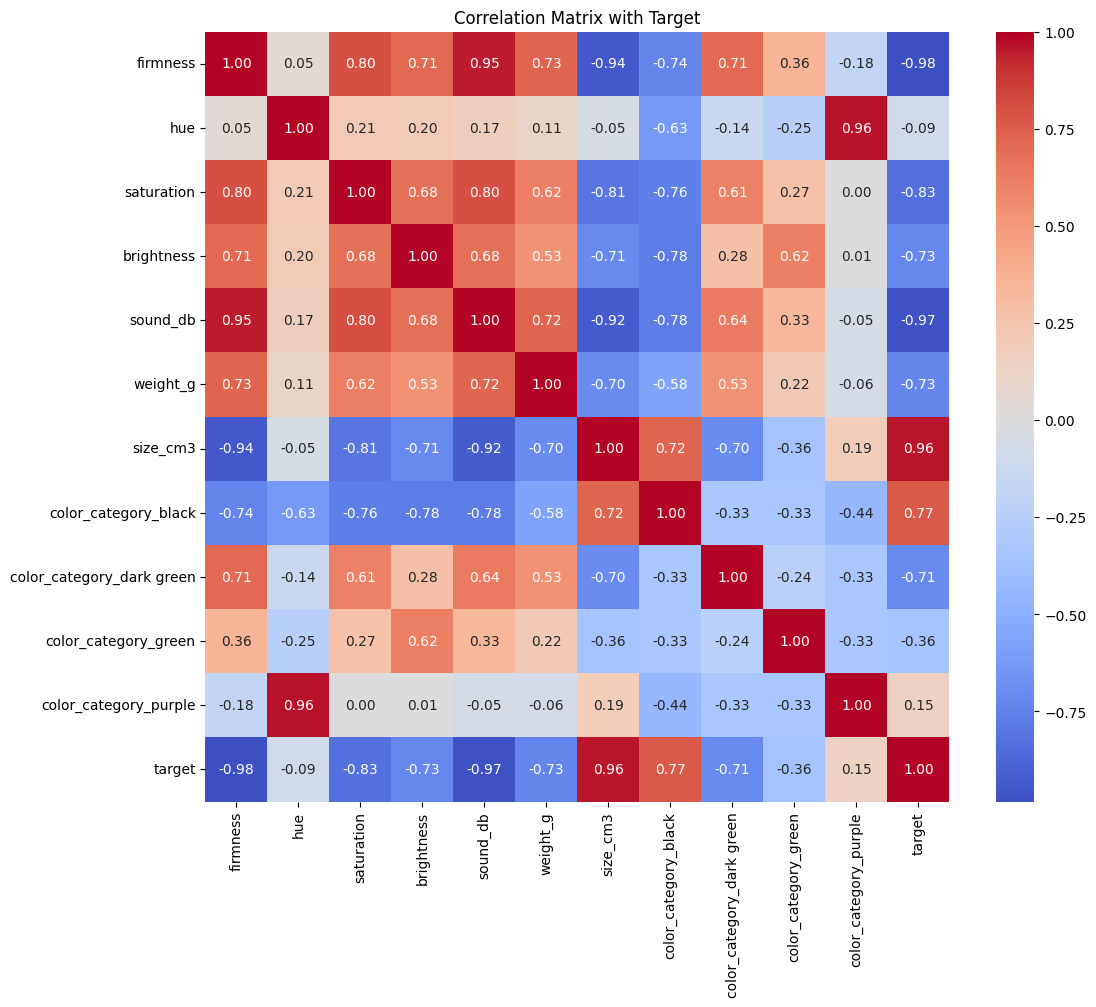

In [36]:
import seaborn as sns

def show_correlation_matrix(x, y):
    x = x.join(y)
    correlation_matrix = x.corr(numeric_only=True)
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title('Correlation Matrix with Target')
    plt.show()

show_correlation_matrix(x_train, y_train)

## Train the model

In [37]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train[:180], y_train[:180])

C:\Users\m.rahimi\PycharmProjects\browser-use\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [43]:
svm_clf.predict(x_train.iloc[181].to_numpy().reshape(1, -1))

C:\Users\m.rahimi\PycharmProjects\browser-use\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([3])

In [45]:
y_train.iloc[181]

target    3
Name: 67, dtype: int64

C:\Users\m.rahimi\PycharmProjects\browser-use\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m.rahimi\PycharmProjects\browser-use\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m.rahimi\PycharmProjects\browser-use\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


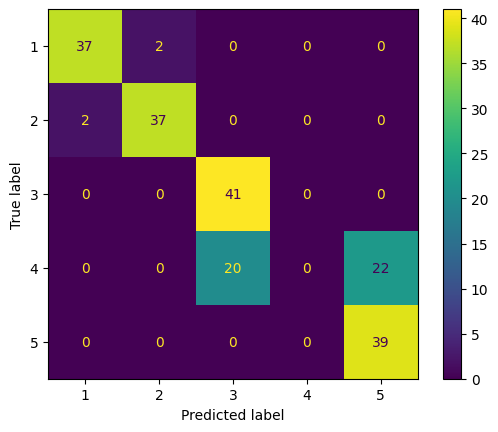

In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(svm_clf, x_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()